In [1]:
#set the current working directory according to requirements
import os
os.chdir('D:\\Projects\\datasets\\memes')
import cv2
import tqdm
from random import shuffle
from keras.models import Sequential,model_from_json
from keras.layers import *
from keras.optimizers import *
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow.python.keras.applications.resnet50 import preprocess_input
# from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [2]:
#loading images/preprocessing them
path1='memes/'
path2='memesnt/'
path3='test/'
# imgs=os.listdir(path1)

In [3]:
#A one hot encoding function
def one_hot_encoder(img):
    label=img.split('.')[0]
#     path=os.path(img).splt('/')[-1]
    if label.isalnum():
        ohl=np.array([1,0])
    else:
        ohl=np.array([0,1])
    return ohl 

In [9]:
def feature_extractor():
    train_images=[]
#     tr=[]
    for i in tqdm.tqdm(os.listdir(path1)):
        path=os.path.join(path1,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
#         tr.append(img)
#         print(img)
#         train_images.append([np.array(img),one_hot_encoder(i)])
        train_images.append([np.array(img),np.array([1,0])])
    for i in tqdm.tqdm(os.listdir(path2)):
        path=os.path.join(path2,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
#         tr.append(img)
        train_images.append([np.array(img),np.array([0,1])])
    shuffle(train_images)
    return (train_images)
def test_data_reader():
    test_images=[]
#     te=[]
    for i in tqdm.tqdm(os.listdir(path3)):
        path=os.path.join(path3,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
#         te.append(img)
        test_images.append([np.array(img),one_hot_encoder(i)])
    return (test_images)

In [10]:
training_images = feature_extractor()

tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])


100%|████████████████████████████████████████████████████████████████████████████| 2340/2340 [00:01<00:00, 1506.91it/s]


In [11]:
testing_images = test_data_reader()
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

 54%|███████████████████████████████████████████▎                                    | 203/375 [00:06<00:04, 39.54it/s]


error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [70]:
model=Sequential()

model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(2,activation='softmax'))
optimizer=Adam(lr=1e-3)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=100)
# model.fit(x=X_pca_train,y=tr_lbl_data,epochs=50,batch_size=100)
model.summary()

Epoch 1/50
5460/5460 [==============================] - ETA: 7:28 - loss: 5.5206 - acc: 0.470 - ETA: 2:25 - loss: 4.8149 - acc: 0.563 - ETA: 1:24 - loss: 4.3568 - acc: 0.578 - ETA: 58s - loss: 4.0286 - acc: 0.581 - ETA: 43s - loss: 3.6602 - acc: 0.58 - ETA: 34s - loss: 3.2518 - acc: 0.59 - ETA: 28s - loss: 2.8898 - acc: 0.60 - ETA: 23s - loss: 2.6039 - acc: 0.61 - ETA: 19s - loss: 2.3562 - acc: 0.63 - ETA: 16s - loss: 2.1704 - acc: 0.64 - ETA: 14s - loss: 2.0270 - acc: 0.65 - ETA: 12s - loss: 1.9000 - acc: 0.66 - ETA: 10s - loss: 1.7861 - acc: 0.66 - ETA: 9s - loss: 1.6860 - acc: 0.6763 - ETA: 8s - loss: 1.6046 - acc: 0.683 - ETA: 7s - loss: 1.5332 - acc: 0.688 - ETA: 6s - loss: 1.4667 - acc: 0.693 - ETA: 5s - loss: 1.4038 - acc: 0.702 - ETA: 4s - loss: 1.3449 - acc: 0.710 - ETA: 3s - loss: 1.2966 - acc: 0.716 - ETA: 3s - loss: 1.2470 - acc: 0.724 - ETA: 2s - loss: 1.2057 - acc: 0.730 - ETA: 2s - loss: 1.1659 - acc: 0.736 - ETA: 1s - loss: 1.1325 - acc: 0.741 - ETA: 1s - loss: 1.1019 -

5460/5460 [==============================] - ETA: 1s - loss: 0.0150 - acc: 1.000 - ETA: 1s - loss: 0.1094 - acc: 0.956 - ETA: 1s - loss: 0.0878 - acc: 0.964 - ETA: 1s - loss: 0.1180 - acc: 0.951 - ETA: 1s - loss: 0.1048 - acc: 0.957 - ETA: 1s - loss: 0.1057 - acc: 0.954 - ETA: 1s - loss: 0.1066 - acc: 0.957 - ETA: 1s - loss: 0.0998 - acc: 0.960 - ETA: 1s - loss: 0.0983 - acc: 0.961 - ETA: 1s - loss: 0.0925 - acc: 0.963 - ETA: 1s - loss: 0.0885 - acc: 0.964 - ETA: 1s - loss: 0.0857 - acc: 0.965 - ETA: 1s - loss: 0.0816 - acc: 0.968 - ETA: 0s - loss: 0.0794 - acc: 0.969 - ETA: 0s - loss: 0.0778 - acc: 0.969 - ETA: 0s - loss: 0.0773 - acc: 0.969 - ETA: 0s - loss: 0.0754 - acc: 0.970 - ETA: 0s - loss: 0.0745 - acc: 0.970 - ETA: 0s - loss: 0.0724 - acc: 0.971 - ETA: 0s - loss: 0.0730 - acc: 0.971 - ETA: 0s - loss: 0.0725 - acc: 0.971 - ETA: 0s - loss: 0.0703 - acc: 0.972 - ETA: 0s - loss: 0.0689 - acc: 0.972 - ETA: 0s - loss: 0.0671 - acc: 0.973 - ETA: 0s - loss: 0.0673 - acc: 0.973 - ETA: 

5460/5460 [==============================] - ETA: 1s - loss: 0.0729 - acc: 0.970 - ETA: 1s - loss: 0.0560 - acc: 0.973 - ETA: 1s - loss: 0.0489 - acc: 0.978 - ETA: 1s - loss: 0.0448 - acc: 0.980 - ETA: 1s - loss: 0.0428 - acc: 0.980 - ETA: 1s - loss: 0.0404 - acc: 0.981 - ETA: 1s - loss: 0.0415 - acc: 0.982 - ETA: 1s - loss: 0.0437 - acc: 0.982 - ETA: 1s - loss: 0.0403 - acc: 0.984 - ETA: 1s - loss: 0.0415 - acc: 0.984 - ETA: 1s - loss: 0.0433 - acc: 0.984 - ETA: 1s - loss: 0.0456 - acc: 0.983 - ETA: 1s - loss: 0.0441 - acc: 0.984 - ETA: 0s - loss: 0.0438 - acc: 0.984 - ETA: 0s - loss: 0.0441 - acc: 0.984 - ETA: 0s - loss: 0.0414 - acc: 0.985 - ETA: 0s - loss: 0.0403 - acc: 0.985 - ETA: 0s - loss: 0.0393 - acc: 0.985 - ETA: 0s - loss: 0.0415 - acc: 0.985 - ETA: 0s - loss: 0.0410 - acc: 0.985 - ETA: 0s - loss: 0.0411 - acc: 0.985 - ETA: 0s - loss: 0.0395 - acc: 0.986 - ETA: 0s - loss: 0.0390 - acc: 0.986 - ETA: 0s - loss: 0.0382 - acc: 0.986 - ETA: 0s - loss: 0.0381 - acc: 0.986 - ETA: 

5460/5460 [==============================] - ETA: 1s - loss: 0.0618 - acc: 0.970 - ETA: 1s - loss: 0.0831 - acc: 0.970 - ETA: 1s - loss: 0.0630 - acc: 0.976 - ETA: 1s - loss: 0.0491 - acc: 0.981 - ETA: 1s - loss: 0.0410 - acc: 0.984 - ETA: 1s - loss: 0.0421 - acc: 0.984 - ETA: 1s - loss: 0.0410 - acc: 0.986 - ETA: 1s - loss: 0.0406 - acc: 0.986 - ETA: 1s - loss: 0.0390 - acc: 0.986 - ETA: 1s - loss: 0.0391 - acc: 0.986 - ETA: 1s - loss: 0.0441 - acc: 0.986 - ETA: 1s - loss: 0.0428 - acc: 0.986 - ETA: 1s - loss: 0.0431 - acc: 0.986 - ETA: 0s - loss: 0.0413 - acc: 0.986 - ETA: 0s - loss: 0.0402 - acc: 0.986 - ETA: 0s - loss: 0.0403 - acc: 0.986 - ETA: 0s - loss: 0.0389 - acc: 0.987 - ETA: 0s - loss: 0.0379 - acc: 0.987 - ETA: 0s - loss: 0.0366 - acc: 0.987 - ETA: 0s - loss: 0.0356 - acc: 0.988 - ETA: 0s - loss: 0.0369 - acc: 0.988 - ETA: 0s - loss: 0.0357 - acc: 0.988 - ETA: 0s - loss: 0.0374 - acc: 0.988 - ETA: 0s - loss: 0.0362 - acc: 0.989 - ETA: 0s - loss: 0.0389 - acc: 0.988 - ETA: 

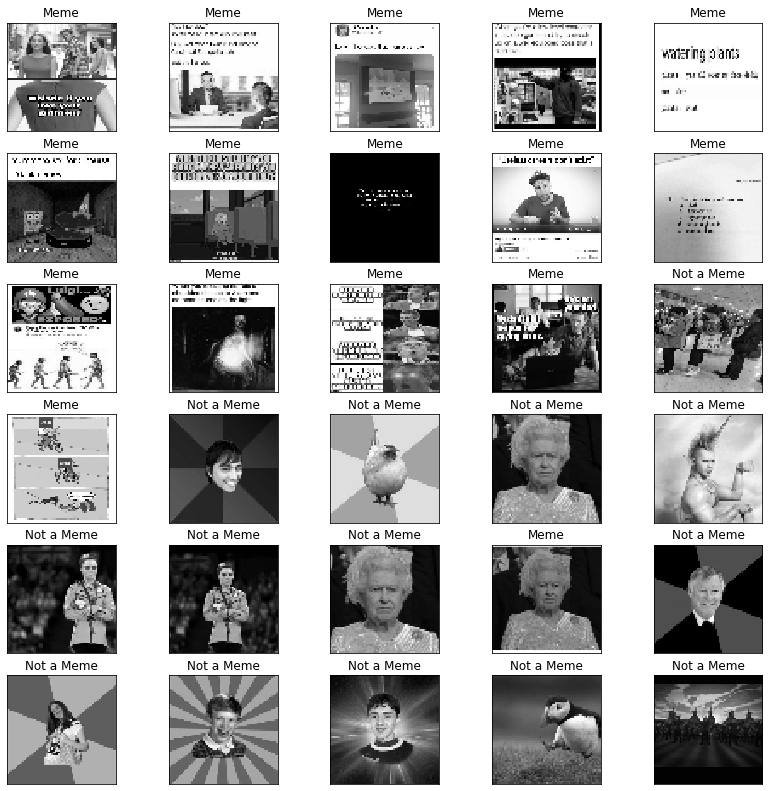

In [71]:
fig=plt.figure(figsize=(14,14))
for cnt,data in enumerate(testing_images[190:220]):
    y=fig.add_subplot(6,5,cnt+1)
    img=data[0]
    data=img.reshape(1,64,64,1)
    model_out=model.predict([data])
    
    if np.argmax(model_out)==1:
        str_label='Not a Meme'
    else:
        str_label='Meme'
        
    y=plt.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)